In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
dataset = pd.read_csv('Customer_churn_data.csv')
dataset.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [87]:
dataset.info()
dataset.shape
dataset.describe()
dataset.columns

dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [88]:
dataset['InternetService'] = dataset['InternetService'].fillna('')
dataset['InternetService'].head()

dataset.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [89]:
dataset.duplicated().sum()

0

In [90]:
categorical_col = dataset.select_dtypes(include=['object']).columns.tolist()
categorical_col
numerical_col = dataset.select_dtypes(exclude=['object']).columns.tolist()
numerical_col

['CustomerID', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

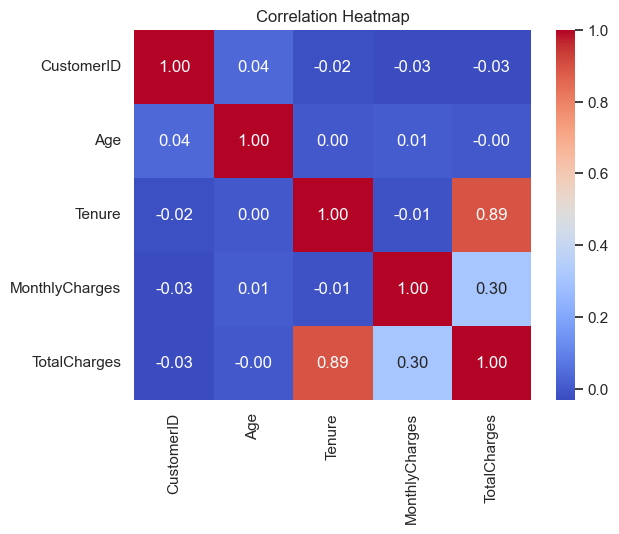

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [91]:
corr = dataset[numerical_col].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap')
plt.show()

corr

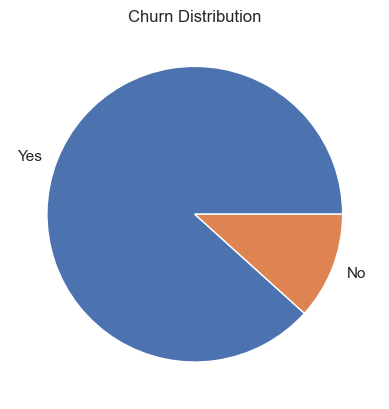

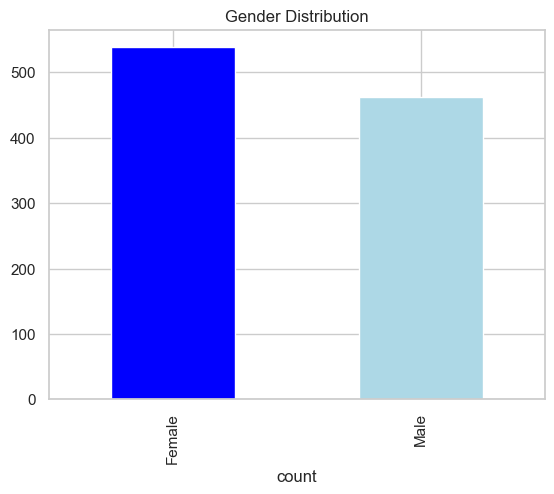

Gender
Female    538
Male      462
Name: count, dtype: int64

In [92]:
sns.set(style='whitegrid')
dataset['Churn'].value_counts().plot(kind='pie', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

dataset['Gender'].value_counts().plot(kind='bar', color=['blue', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('count')
plt.show()

dataset['Gender'].value_counts()

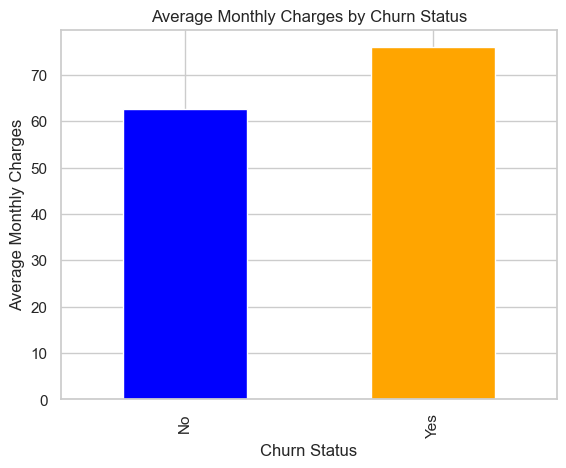

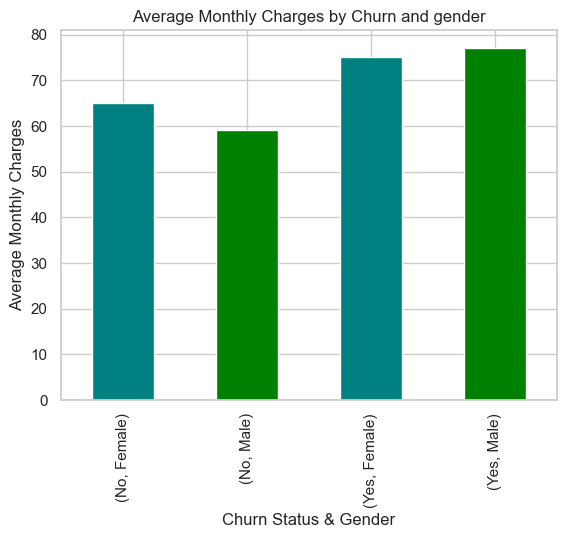

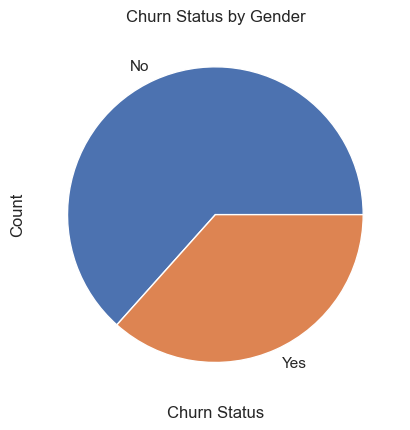

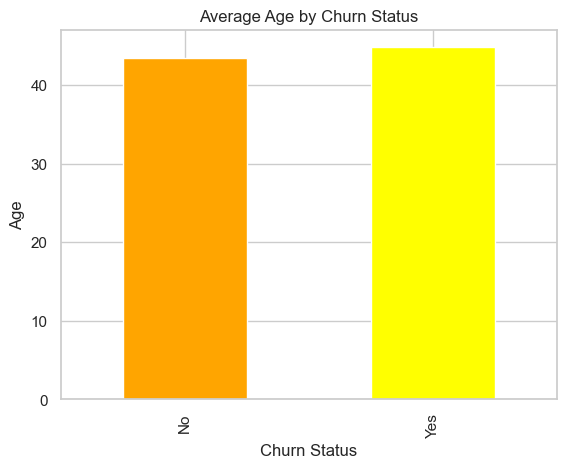

In [93]:
dataset.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Monthly Charges')
plt.show()

dataset.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean().plot(kind='bar', color=['Teal', 'Green'])
plt.title('Average Monthly Charges by Churn and gender')
plt.xlabel('Churn Status & Gender')  
plt.ylabel('Average Monthly Charges')
plt.legend
plt.show()

dataset.groupby('Churn')['Tenure'].mean().plot(kind='pie')
plt.title('Churn Status by Gender')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.legend
plt.show()

dataset.groupby('Churn')['Age'].mean().plot(kind='bar', color=['orange', 'Yellow'])
plt.title('Average Age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Age')
plt.show()

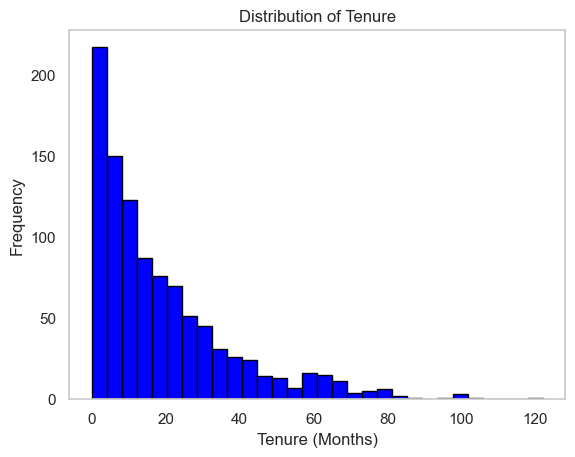

In [94]:
sns.histplot = dataset['Tenure'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Tenure')    
plt.xlabel('Tenure (Months)')
plt.grid(False)
plt.ylabel('Frequency')
plt.show()

In [95]:
x = dataset[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]
y = dataset['Churn']

In [96]:
x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'female' else 0)
x

y = y.apply(lambda x: 1 if x == 'Yes' else 0)
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [97]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.50%


In [98]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,0,15,111.72
998,39,0,68,65.67


In [99]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [100]:
print('Predicted Value: ', model.predict([[62, 0, 9,80.93]])[0])


Predicted Value:  1


In [101]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
}

In [102]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(x_train, y_train)
gridkn.fit(x_train, y_train)

y_pred = gridkn.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy_kn * 100:.2f}%')

KNN Accuracy: 88.50%


In [103]:
from sklearn.svm import SVC
svm = SVC()

param_grid_svm = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf'],
}

gridsvc = GridSearchCV(SVC(), param_grid_svm, cv=5)
gridsvc.fit(x_train, y_train)
y_pred_svm = gridsvc.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')


SVM Accuracy: 91.50%


In [104]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(x_train, y_train)

y_pred_tree = grid_tree.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')

Decision Tree Accuracy: 87.50%


In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [32, 64, 128, 256],
    'max_depth': [2, 3, 4],
    'bootstrap' : [True, False]
}

grid_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv=5)
grid_rfc.fit(x_train, y_train)
y_pred_rfc = grid_rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Random Forest Accuracy: {accuracy_rfc * 100:.2f}%')

Random Forest Accuracy: 91.50%


In [106]:
grid_rfc.best_params_
#grid_rfc.best_score_

{'bootstrap': True, 'max_depth': 2, 'n_estimators': 32}

In [108]:
best_rfc = grid_rfc.best_estimator_  
sample = np.array([[62, 0, 9, 80.93]])  
sample_scaled = scaler.transform(sample)  
print('Predicted Value: ', best_rfc.predict(sample_scaled)[0])

Predicted Value:  1
